In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

df = pd.DataFrame({
    'x': [0.1, 0.3, 0.6, 0.7],
    'y':[0.2, 0.25, 0.4, 0.7],
})

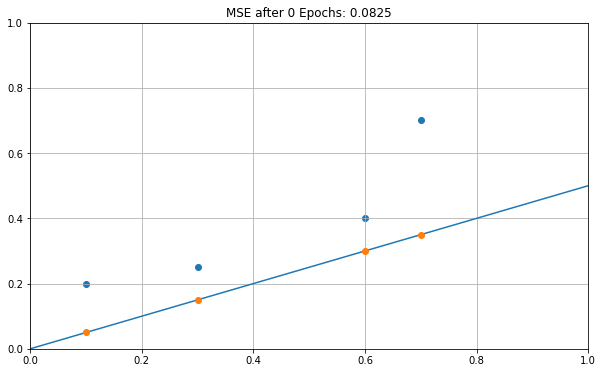

In [5]:
init_w11 = 0.5
init_b11 = 0
init_predictions = [0.05, 0.15, 0.30, 0.35]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axline((0, init_b11), slope=init_w11)
ax.scatter(df['x'], df['y'])
ax.scatter(df['x'], init_predictions, zorder=3)
ax.set_title("MSE after 0 Epochs: {}".format(0.0825))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
plt.show()

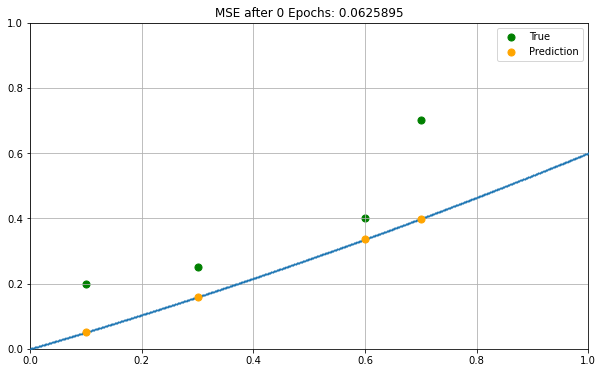

In [7]:

init_predictions = [0.051, 0.159, 0.336, 0.399]

init_w111 = 0.5
init_w112 = 0.1
init_b11 = 0

def forward_pass(x, w111, w112, b11):
    h11 = w111*x + w112*(x*x) + b11
    return h11

line = [forward_pass(i, init_w111, init_w112, init_b11) for i in np.linspace(0,1,1000)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.linspace(0,1,1000), line, zorder=3, s=1/2)
ax.scatter(df['x'], df['y'], s=50, c='green', label="True")
ax.scatter(df['x'], init_predictions, zorder=3, s=50, c='orange', label="Prediction")
ax.set_title("MSE after 0 Epochs: {}".format(0.0625895))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
ax.legend()
plt.show()

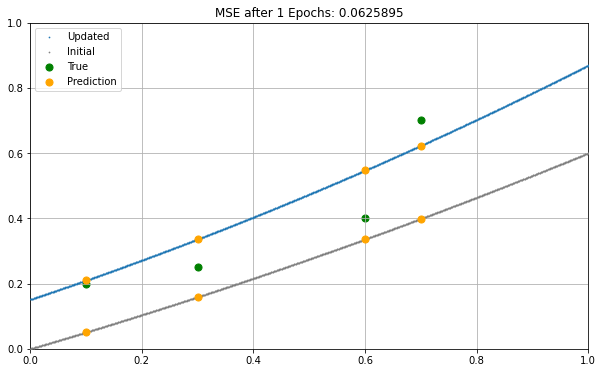

In [8]:
second_predictions = [0.209983, 0.336152, 0.547163, 0.623303]

w111 = 0.572825
w112 = 0.1450525
b11 = 0.15125

def forward_pass(x, w111, w112, b11):
    h11 = w111*x + w112*(x*x) + b11
    return h11

init_line = [forward_pass(i, init_w111, init_w112, init_b11) for i in np.linspace(0,1,1000)]
second_line = [forward_pass(i, w111, w112, b11) for i in np.linspace(0,1,1000)]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(np.linspace(0,1,1000), second_line, zorder=3, s=1/2,label='Updated')
ax.scatter(np.linspace(0,1,1000), init_line, zorder=3, c='grey', s=1/2, label='Initial')
ax.scatter(df['x'], df['y'], s=50, c='green', label="True")
ax.scatter(df['x'], second_predictions, zorder=3, s=50, c='orange', label="Prediction")
ax.scatter(df['x'], init_predictions, zorder=3, s=50, c='orange')
ax.set_title("MSE after 1 Epochs: {}".format(0.0625895))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.grid()
ax.legend()
plt.show()

In [9]:
class SimpleNeuralNetwork():
    def __init__(self, X, Y):
        self.w111 = 0.5
        self.w112 = 0.1
        self.b11 = 0
        self.preds = []
        self.lr = 1
        self.X = X
        self.Y = Y
        
    def forward_pass(self):
        self.preds = []
        for x in self.X:
            y_hat = self.w111*x + self.w112*(x*x) + self.b11
            self.preds.append(y_hat)
    
    def calc_error(self):
        # 1/2 * MSE
        return 1/2 * sum([(y - yhat)**2 for y, yhat in zip(self.Y, self.preds)])
        
    def back_prop(self):
        w111s = []
        w112s = []
        b11s = []
        
        # -- Chained partial derivatives --
        for x, y, yhat in zip(self.X, self.Y, self.preds):
            w111s.append((-(y - yhat)) * 1 * (x))
            w112s.append((-(y - yhat)) * 1 * (x**2))
            b11s.append((-(y - yhat)) * 1 * 1)

        w111_change = sum(w111s)/len(w111s)
        w112_change = sum(w112s)/len(w112s)
        b11_change = sum(b11s)/len(b11s)

        # -- Updating weights and biases --
        self.w111 = self.w111 - self.lr * (w111_change)
        self.w112 = self.w112 - self.lr * (w112_change)
        self.b11 = self.b11 - self.lr * (b11_change)
        
    def plot_model(self, epoch, plot_num, nrows, ncols):
        line = [self.w111*i + self.w112*(i*i) + self.b11 for i in np.linspace(0,1,1000)]
        ax = plt.subplot(nrows, ncols, plot_num+1)
        ax.scatter(np.linspace(0,1,1000), line, zorder=3, s=1/2)
        ax.scatter(self.X, self.Y, s=50, c='green', label="True")
        ax.scatter(self.X, self.preds, zorder=3, s=50, c='orange', label="Prediction")
        ax.set_title("Epoch: {}, Error: {:.5f}".format(epoch, self.calc_error()))
        ax.set_xlim([0,1])
        ax.set_ylim([0,1])
        ax.grid()
        ax.legend(loc = "upper left")

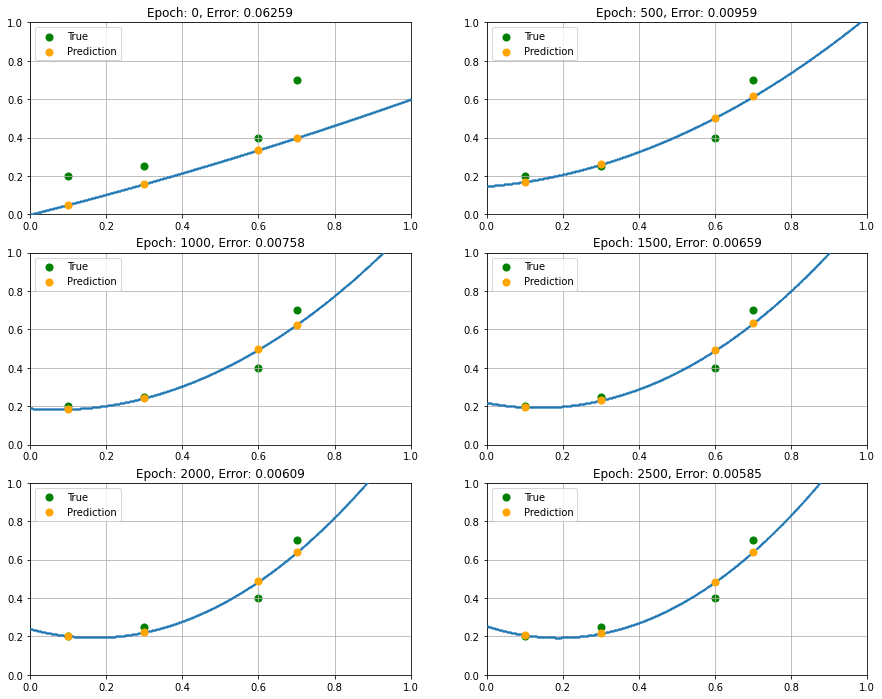

In [10]:
NN = SimpleNeuralNetwork(df['x'].values, df['y'].values)
plot_num = 0
plot_y = 0
fig, ax = plt.subplots(figsize=(15, 12), nrows=3, ncols=2)

for epoch in range(2501):
    NN.forward_pass()
    if epoch%500 == 0:
        NN.plot_model(epoch, plot_num, nrows=3, ncols=2)
        plot_num += 1
        
    NN.back_prop()
    
plt.show()